# Model creation

## Libs

In [1]:
from prepareRSSI import RssiDatas
import pandas as pd
import parameters as param
import numpy as np
import tensorflow as tf
#import intel-tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K # to set the learning rate

## Import the RSSI, mac and zones values

In [2]:
RSSI = RssiDatas()

#df = pd.read_csv(param.rssi_csv_output)
#df.head(100)

rssi_tmp = np.genfromtxt(param.rssi_csv_output, delimiter=',')
# deleting index column and row :
rssi_tmp = np.delete(rssi_tmp, 0, 1)
RSSI.rssi = np.delete(rssi_tmp, 0, 0)

#print("RSSI shape :",np.shape(RSSI.rssi))
#print("RSSI :\n",RSSI.rssi)

mac_tmp = np.genfromtxt(param.mac_csv_output, delimiter=',', dtype=str)
# deleting index column and row :
mac_tmp = mac_tmp[:,1] # keep only the column with the mac adresses
RSSI.mac = np.delete(mac_tmp, 0) # delete the first row because empty
print("mac size : ", np.size(RSSI.mac))
#print("mac :\n",RSSI.mac)

zones_tmp = np.genfromtxt(param.zones_csv_output, delimiter=',')
# deleting index column and row :
zones_tmp = zones_tmp[:,1] # keep only the colomn with the zone ids
RSSI.zones = np.delete(zones_tmp, 0, 0) # delete the first row because empty

#print("Zones size :",np.size(RSSI.zones))
#print("Zones :\n",RSSI.zones)

mac size :  128


## Load data

In [3]:
print("RSSI.rssi : ", np.shape(RSSI.rssi))
print("RSSI.zones : ", np.shape(RSSI.zones))
zonesNb = 7 # number of zones

# create the zone output array of vectors :
y_zones = np.zeros([np.size(RSSI.zones), zonesNb])
for i in range(np.size(RSSI.zones)):
    y_zones[i, int(RSSI.zones[i])] = 1
#print(y_zones)
#print(np.shape(y_zones))

train_data, test_data, train_labels, test_labels = train_test_split(RSSI.rssi,y_zones)
print("train_data : ", np.shape(train_data))
print("train_labels : ", np.shape(train_labels))
print("test_data : ", np.shape(test_data))
print("test_labels : ", np.shape(test_labels))
train_data = train_data/(-95)
test_data = test_data/(-95)
train_labels = train_labels
test_labels = test_labels
print(np.shape(train_data))
print(np.shape(train_labels))

RSSI.rssi :  (265, 128)
RSSI.zones :  (265,)
train_data :  (198, 128)
train_labels :  (198, 7)
test_data :  (67, 128)
test_labels :  (67, 7)
(198, 128)
(198, 7)


## Create the model

In [4]:
model = tf.keras.models.Sequential([
  #tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(7)
])

## Compile the model

In [5]:
model.compile(optimizer='adam',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])
K.set_value(model.optimizer.learning_rate, param.learningRate)

## Train the model

In [6]:
# feed the model :
print(np.shape(train_data))
print(np.shape(train_labels))
history = model.fit(train_data, train_labels, epochs=param.epochs)
# evaluate accuracy
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

(198, 128)
(198, 7)
Epoch 1/1500
7/7 [==============================] - 0s 989us/step - loss: 0.2776 - accuracy: 0.1566
Epoch 2/1500
7/7 [==============================] - 0s 907us/step - loss: 0.2160 - accuracy: 0.1566
Epoch 3/1500
7/7 [==============================] - 0s 939us/step - loss: 0.1767 - accuracy: 0.1566
Epoch 4/1500
7/7 [==============================] - 0s 997us/step - loss: 0.1541 - accuracy: 0.1616
Epoch 5/1500
7/7 [==============================] - 0s 1ms/step - loss: 0.1398 - accuracy: 0.1667
Epoch 6/1500
7/7 [==============================] - 0s 942us/step - loss: 0.1315 - accuracy: 0.1414
Epoch 7/1500
7/7 [==============================] - 0s 972us/step - loss: 0.1267 - accuracy: 0.1111
Epoch 8/1500
7/7 [==============================] - 0s 927us/step - loss: 0.1247 - accuracy: 0.1162
Epoch 9/1500
7/7 [==============================] - 0s 967us/step - loss: 0.1230 - accuracy: 0.1212
Epoch 10/1500
7/7 [==============================] - 0s 1ms/step - loss: 0.1222 - 

7/7 [==============================] - 0s 892us/step - loss: 0.1079 - accuracy: 0.4798
Epoch 83/1500
7/7 [==============================] - 0s 907us/step - loss: 0.1077 - accuracy: 0.4697
Epoch 84/1500
7/7 [==============================] - 0s 955us/step - loss: 0.1077 - accuracy: 0.4798
Epoch 85/1500
7/7 [==============================] - 0s 873us/step - loss: 0.1072 - accuracy: 0.5101
Epoch 86/1500
7/7 [==============================] - 0s 1ms/step - loss: 0.1070 - accuracy: 0.5152
Epoch 87/1500
7/7 [==============================] - 0s 983us/step - loss: 0.1069 - accuracy: 0.5404
Epoch 88/1500
7/7 [==============================] - 0s 988us/step - loss: 0.1065 - accuracy: 0.5606
Epoch 89/1500
7/7 [==============================] - 0s 863us/step - loss: 0.1064 - accuracy: 0.5303
Epoch 90/1500
7/7 [==============================] - 0s 853us/step - loss: 0.1062 - accuracy: 0.5707
Epoch 91/1500
7/7 [==============================] - 0s 815us/step - loss: 0.1060 - accuracy: 0.5859
Epoch 

7/7 [==============================] - 0s 788us/step - loss: 0.0901 - accuracy: 0.7323
Epoch 163/1500
7/7 [==============================] - 0s 800us/step - loss: 0.0897 - accuracy: 0.7020
Epoch 164/1500
7/7 [==============================] - 0s 848us/step - loss: 0.0896 - accuracy: 0.7323
Epoch 165/1500
7/7 [==============================] - 0s 975us/step - loss: 0.0894 - accuracy: 0.7576
Epoch 166/1500
7/7 [==============================] - 0s 922us/step - loss: 0.0892 - accuracy: 0.7626
Epoch 167/1500
7/7 [==============================] - 0s 903us/step - loss: 0.0888 - accuracy: 0.7778
Epoch 168/1500
7/7 [==============================] - 0s 874us/step - loss: 0.0885 - accuracy: 0.7525
Epoch 169/1500
7/7 [==============================] - 0s 853us/step - loss: 0.0885 - accuracy: 0.7475
Epoch 170/1500
7/7 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.7778
Epoch 171/1500
7/7 [==============================] - 0s 995us/step - loss: 0.0880 - accuracy: 0.81

7/7 [==============================] - 0s 878us/step - loss: 0.0728 - accuracy: 0.8384
Epoch 243/1500
7/7 [==============================] - 0s 876us/step - loss: 0.0724 - accuracy: 0.8485
Epoch 244/1500
7/7 [==============================] - 0s 896us/step - loss: 0.0720 - accuracy: 0.8636
Epoch 245/1500
7/7 [==============================] - 0s 888us/step - loss: 0.0718 - accuracy: 0.8535
Epoch 246/1500
7/7 [==============================] - 0s 963us/step - loss: 0.0718 - accuracy: 0.8434
Epoch 247/1500
7/7 [==============================] - 0s 856us/step - loss: 0.0716 - accuracy: 0.8485
Epoch 248/1500
7/7 [==============================] - 0s 901us/step - loss: 0.0714 - accuracy: 0.8737
Epoch 249/1500
7/7 [==============================] - 0s 897us/step - loss: 0.0713 - accuracy: 0.8687
Epoch 250/1500
7/7 [==============================] - 0s 879us/step - loss: 0.0712 - accuracy: 0.8737
Epoch 251/1500
7/7 [==============================] - 0s 880us/step - loss: 0.0709 - accuracy: 0.

7/7 [==============================] - 0s 899us/step - loss: 0.0580 - accuracy: 0.9141
Epoch 323/1500
7/7 [==============================] - 0s 907us/step - loss: 0.0575 - accuracy: 0.9141
Epoch 324/1500
7/7 [==============================] - 0s 957us/step - loss: 0.0576 - accuracy: 0.8990
Epoch 325/1500
7/7 [==============================] - 0s 945us/step - loss: 0.0571 - accuracy: 0.8990
Epoch 326/1500
7/7 [==============================] - 0s 958us/step - loss: 0.0569 - accuracy: 0.8990
Epoch 327/1500
7/7 [==============================] - 0s 897us/step - loss: 0.0571 - accuracy: 0.9040
Epoch 328/1500
7/7 [==============================] - 0s 886us/step - loss: 0.0568 - accuracy: 0.9040
Epoch 329/1500
7/7 [==============================] - 0s 934us/step - loss: 0.0568 - accuracy: 0.8990
Epoch 330/1500
7/7 [==============================] - 0s 880us/step - loss: 0.0569 - accuracy: 0.8889
Epoch 331/1500
7/7 [==============================] - 0s 935us/step - loss: 0.0565 - accuracy: 0.

7/7 [==============================] - 0s 903us/step - loss: 0.0467 - accuracy: 0.9192
Epoch 403/1500
7/7 [==============================] - 0s 905us/step - loss: 0.0465 - accuracy: 0.9141
Epoch 404/1500
7/7 [==============================] - 0s 1ms/step - loss: 0.0464 - accuracy: 0.9141
Epoch 405/1500
7/7 [==============================] - 0s 875us/step - loss: 0.0460 - accuracy: 0.9040
Epoch 406/1500
7/7 [==============================] - 0s 934us/step - loss: 0.0461 - accuracy: 0.9141
Epoch 407/1500
7/7 [==============================] - 0s 881us/step - loss: 0.0459 - accuracy: 0.9242
Epoch 408/1500
7/7 [==============================] - 0s 826us/step - loss: 0.0462 - accuracy: 0.9242
Epoch 409/1500
7/7 [==============================] - 0s 902us/step - loss: 0.0453 - accuracy: 0.9192
Epoch 410/1500
7/7 [==============================] - 0s 864us/step - loss: 0.0461 - accuracy: 0.9040
Epoch 411/1500
7/7 [==============================] - 0s 891us/step - loss: 0.0453 - accuracy: 0.91

7/7 [==============================] - 0s 837us/step - loss: 0.0379 - accuracy: 0.9343
Epoch 483/1500
7/7 [==============================] - 0s 891us/step - loss: 0.0380 - accuracy: 0.9293
Epoch 484/1500
7/7 [==============================] - 0s 902us/step - loss: 0.0375 - accuracy: 0.9192
Epoch 485/1500
7/7 [==============================] - 0s 1ms/step - loss: 0.0377 - accuracy: 0.9192
Epoch 486/1500
7/7 [==============================] - 0s 891us/step - loss: 0.0374 - accuracy: 0.9192
Epoch 487/1500
7/7 [==============================] - 0s 863us/step - loss: 0.0375 - accuracy: 0.9242
Epoch 488/1500
7/7 [==============================] - 0s 852us/step - loss: 0.0371 - accuracy: 0.9293
Epoch 489/1500
7/7 [==============================] - 0s 976us/step - loss: 0.0371 - accuracy: 0.9192
Epoch 490/1500
7/7 [==============================] - 0s 1ms/step - loss: 0.0371 - accuracy: 0.9242
Epoch 491/1500
7/7 [==============================] - 0s 952us/step - loss: 0.0372 - accuracy: 0.9141

7/7 [==============================] - 0s 917us/step - loss: 0.0315 - accuracy: 0.9394
Epoch 563/1500
7/7 [==============================] - 0s 949us/step - loss: 0.0312 - accuracy: 0.9343
Epoch 564/1500
7/7 [==============================] - 0s 847us/step - loss: 0.0310 - accuracy: 0.9343
Epoch 565/1500
7/7 [==============================] - 0s 925us/step - loss: 0.0309 - accuracy: 0.9394
Epoch 566/1500
7/7 [==============================] - 0s 910us/step - loss: 0.0306 - accuracy: 0.9394
Epoch 567/1500
7/7 [==============================] - 0s 979us/step - loss: 0.0307 - accuracy: 0.9394
Epoch 568/1500
7/7 [==============================] - 0s 959us/step - loss: 0.0309 - accuracy: 0.9293
Epoch 569/1500
7/7 [==============================] - 0s 1ms/step - loss: 0.0312 - accuracy: 0.9394
Epoch 570/1500
7/7 [==============================] - 0s 916us/step - loss: 0.0307 - accuracy: 0.9394
Epoch 571/1500
7/7 [==============================] - 0s 885us/step - loss: 0.0310 - accuracy: 0.92

7/7 [==============================] - 0s 950us/step - loss: 0.0265 - accuracy: 0.9495
Epoch 643/1500
7/7 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.9646
Epoch 644/1500
7/7 [==============================] - 0s 918us/step - loss: 0.0265 - accuracy: 0.9596
Epoch 645/1500
7/7 [==============================] - 0s 883us/step - loss: 0.0262 - accuracy: 0.9646
Epoch 646/1500
7/7 [==============================] - 0s 911us/step - loss: 0.0263 - accuracy: 0.9646
Epoch 647/1500
7/7 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.9495
Epoch 648/1500
7/7 [==============================] - 0s 877us/step - loss: 0.0262 - accuracy: 0.9545
Epoch 649/1500
7/7 [==============================] - 0s 907us/step - loss: 0.0260 - accuracy: 0.9596
Epoch 650/1500
7/7 [==============================] - 0s 929us/step - loss: 0.0260 - accuracy: 0.9545
Epoch 651/1500
7/7 [==============================] - 0s 960us/step - loss: 0.0258 - accuracy: 0.9495

7/7 [==============================] - 0s 893us/step - loss: 0.0224 - accuracy: 0.9697
Epoch 723/1500
7/7 [==============================] - 0s 924us/step - loss: 0.0222 - accuracy: 0.9697
Epoch 724/1500
7/7 [==============================] - 0s 937us/step - loss: 0.0226 - accuracy: 0.9646
Epoch 725/1500
7/7 [==============================] - 0s 943us/step - loss: 0.0225 - accuracy: 0.9697
Epoch 726/1500
7/7 [==============================] - 0s 920us/step - loss: 0.0224 - accuracy: 0.9596
Epoch 727/1500
7/7 [==============================] - 0s 989us/step - loss: 0.0224 - accuracy: 0.9646
Epoch 728/1500
7/7 [==============================] - 0s 849us/step - loss: 0.0220 - accuracy: 0.9697
Epoch 729/1500
7/7 [==============================] - 0s 890us/step - loss: 0.0223 - accuracy: 0.9798
Epoch 730/1500
7/7 [==============================] - 0s 953us/step - loss: 0.0224 - accuracy: 0.9697
Epoch 731/1500
7/7 [==============================] - 0s 826us/step - loss: 0.0222 - accuracy: 0.

7/7 [==============================] - 0s 848us/step - loss: 0.0191 - accuracy: 0.9798
Epoch 803/1500
7/7 [==============================] - 0s 878us/step - loss: 0.0189 - accuracy: 0.9747
Epoch 804/1500
7/7 [==============================] - 0s 924us/step - loss: 0.0193 - accuracy: 0.9798
Epoch 805/1500
7/7 [==============================] - 0s 980us/step - loss: 0.0192 - accuracy: 0.9798
Epoch 806/1500
7/7 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 0.9747
Epoch 807/1500
7/7 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9798
Epoch 808/1500
7/7 [==============================] - 0s 955us/step - loss: 0.0190 - accuracy: 0.9747
Epoch 809/1500
7/7 [==============================] - 0s 967us/step - loss: 0.0190 - accuracy: 0.9747
Epoch 810/1500
7/7 [==============================] - 0s 970us/step - loss: 0.0196 - accuracy: 0.9848
Epoch 811/1500
7/7 [==============================] - 0s 881us/step - loss: 0.0192 - accuracy: 0.9747

7/7 [==============================] - 0s 872us/step - loss: 0.0166 - accuracy: 0.9848
Epoch 883/1500
7/7 [==============================] - 0s 930us/step - loss: 0.0164 - accuracy: 0.9798
Epoch 884/1500
7/7 [==============================] - 0s 856us/step - loss: 0.0162 - accuracy: 0.9949
Epoch 885/1500
7/7 [==============================] - 0s 1ms/step - loss: 0.0162 - accuracy: 0.9798
Epoch 886/1500
7/7 [==============================] - 0s 905us/step - loss: 0.0162 - accuracy: 0.9798
Epoch 887/1500
7/7 [==============================] - 0s 937us/step - loss: 0.0162 - accuracy: 0.9949
Epoch 888/1500
7/7 [==============================] - 0s 900us/step - loss: 0.0163 - accuracy: 0.9848
Epoch 889/1500
7/7 [==============================] - 0s 933us/step - loss: 0.0167 - accuracy: 0.9949
Epoch 890/1500
7/7 [==============================] - 0s 869us/step - loss: 0.0166 - accuracy: 0.9747
Epoch 891/1500
7/7 [==============================] - 0s 870us/step - loss: 0.0162 - accuracy: 0.98

7/7 [==============================] - 0s 900us/step - loss: 0.0145 - accuracy: 0.9949
Epoch 963/1500
7/7 [==============================] - 0s 848us/step - loss: 0.0141 - accuracy: 0.9899
Epoch 964/1500
7/7 [==============================] - 0s 887us/step - loss: 0.0142 - accuracy: 0.9949
Epoch 965/1500
7/7 [==============================] - 0s 906us/step - loss: 0.0141 - accuracy: 0.9949
Epoch 966/1500
7/7 [==============================] - 0s 854us/step - loss: 0.0140 - accuracy: 0.9949
Epoch 967/1500
7/7 [==============================] - 0s 862us/step - loss: 0.0139 - accuracy: 0.9949
Epoch 968/1500
7/7 [==============================] - 0s 885us/step - loss: 0.0140 - accuracy: 0.9949
Epoch 969/1500
7/7 [==============================] - 0s 961us/step - loss: 0.0137 - accuracy: 0.9949
Epoch 970/1500
7/7 [==============================] - 0s 884us/step - loss: 0.0139 - accuracy: 0.9949
Epoch 971/1500
7/7 [==============================] - 0s 914us/step - loss: 0.0139 - accuracy: 0.

7/7 [==============================] - 0s 899us/step - loss: 0.0129 - accuracy: 0.9949
Epoch 1043/1500
7/7 [==============================] - 0s 925us/step - loss: 0.0123 - accuracy: 0.9899
Epoch 1044/1500
7/7 [==============================] - 0s 909us/step - loss: 0.0123 - accuracy: 0.9949
Epoch 1045/1500
7/7 [==============================] - 0s 919us/step - loss: 0.0125 - accuracy: 0.9949
Epoch 1046/1500
7/7 [==============================] - 0s 947us/step - loss: 0.0121 - accuracy: 0.9949
Epoch 1047/1500
7/7 [==============================] - 0s 913us/step - loss: 0.0121 - accuracy: 0.9949
Epoch 1048/1500
7/7 [==============================] - 0s 899us/step - loss: 0.0119 - accuracy: 0.9949
Epoch 1049/1500
7/7 [==============================] - 0s 915us/step - loss: 0.0120 - accuracy: 0.9949
Epoch 1050/1500
7/7 [==============================] - 0s 1ms/step - loss: 0.0118 - accuracy: 0.9949
Epoch 1051/1500
7/7 [==============================] - 0s 867us/step - loss: 0.0119 - accur

7/7 [==============================] - 0s 930us/step - loss: 0.0104 - accuracy: 1.0000
Epoch 1122/1500
7/7 [==============================] - 0s 872us/step - loss: 0.0105 - accuracy: 0.9949
Epoch 1123/1500
7/7 [==============================] - 0s 888us/step - loss: 0.0103 - accuracy: 1.0000
Epoch 1124/1500
7/7 [==============================] - 0s 922us/step - loss: 0.0104 - accuracy: 0.9949
Epoch 1125/1500
7/7 [==============================] - 0s 869us/step - loss: 0.0107 - accuracy: 0.9949
Epoch 1126/1500
7/7 [==============================] - 0s 839us/step - loss: 0.0107 - accuracy: 1.0000
Epoch 1127/1500
7/7 [==============================] - 0s 899us/step - loss: 0.0106 - accuracy: 1.0000
Epoch 1128/1500
7/7 [==============================] - 0s 847us/step - loss: 0.0104 - accuracy: 0.9949
Epoch 1129/1500
7/7 [==============================] - 0s 913us/step - loss: 0.0102 - accuracy: 0.9949
Epoch 1130/1500
7/7 [==============================] - 0s 853us/step - loss: 0.0103 - acc

7/7 [==============================] - 0s 868us/step - loss: 0.0095 - accuracy: 1.0000
Epoch 1201/1500
7/7 [==============================] - 0s 790us/step - loss: 0.0093 - accuracy: 1.0000
Epoch 1202/1500
7/7 [==============================] - 0s 858us/step - loss: 0.0092 - accuracy: 1.0000
Epoch 1203/1500
7/7 [==============================] - 0s 831us/step - loss: 0.0091 - accuracy: 1.0000
Epoch 1204/1500
7/7 [==============================] - 0s 900us/step - loss: 0.0093 - accuracy: 1.0000
Epoch 1205/1500
7/7 [==============================] - 0s 897us/step - loss: 0.0090 - accuracy: 1.0000
Epoch 1206/1500
7/7 [==============================] - 0s 837us/step - loss: 0.0092 - accuracy: 1.0000
Epoch 1207/1500
7/7 [==============================] - 0s 850us/step - loss: 0.0092 - accuracy: 1.0000
Epoch 1208/1500
7/7 [==============================] - 0s 854us/step - loss: 0.0092 - accuracy: 1.0000
Epoch 1209/1500
7/7 [==============================] - 0s 831us/step - loss: 0.0091 - acc

7/7 [==============================] - 0s 872us/step - loss: 0.0085 - accuracy: 1.0000
Epoch 1280/1500
7/7 [==============================] - 0s 854us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 1281/1500
7/7 [==============================] - 0s 887us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 1282/1500
7/7 [==============================] - 0s 859us/step - loss: 0.0086 - accuracy: 1.0000
Epoch 1283/1500
7/7 [==============================] - 0s 895us/step - loss: 0.0082 - accuracy: 1.0000
Epoch 1284/1500
7/7 [==============================] - 0s 866us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 1285/1500
7/7 [==============================] - 0s 929us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 1286/1500
7/7 [==============================] - 0s 838us/step - loss: 0.0082 - accuracy: 1.0000
Epoch 1287/1500
7/7 [==============================] - 0s 985us/step - loss: 0.0082 - accuracy: 1.0000
Epoch 1288/1500
7/7 [==============================] - 0s 886us/step - loss: 0.0082 - acc

7/7 [==============================] - 0s 859us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 1359/1500
7/7 [==============================] - 0s 873us/step - loss: 0.0074 - accuracy: 1.0000
Epoch 1360/1500
7/7 [==============================] - 0s 825us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 1361/1500
7/7 [==============================] - 0s 891us/step - loss: 0.0071 - accuracy: 1.0000
Epoch 1362/1500
7/7 [==============================] - 0s 876us/step - loss: 0.0071 - accuracy: 1.0000
Epoch 1363/1500
7/7 [==============================] - 0s 916us/step - loss: 0.0072 - accuracy: 1.0000
Epoch 1364/1500
7/7 [==============================] - 0s 851us/step - loss: 0.0071 - accuracy: 1.0000
Epoch 1365/1500
7/7 [==============================] - 0s 919us/step - loss: 0.0074 - accuracy: 1.0000
Epoch 1366/1500
7/7 [==============================] - 0s 882us/step - loss: 0.0071 - accuracy: 1.0000
Epoch 1367/1500
7/7 [==============================] - 0s 998us/step - loss: 0.0072 - acc

7/7 [==============================] - 0s 931us/step - loss: 0.0066 - accuracy: 1.0000
Epoch 1438/1500
7/7 [==============================] - 0s 878us/step - loss: 0.0066 - accuracy: 1.0000
Epoch 1439/1500
7/7 [==============================] - 0s 899us/step - loss: 0.0064 - accuracy: 1.0000
Epoch 1440/1500
7/7 [==============================] - 0s 867us/step - loss: 0.0064 - accuracy: 1.0000
Epoch 1441/1500
7/7 [==============================] - 0s 887us/step - loss: 0.0063 - accuracy: 1.0000
Epoch 1442/1500
7/7 [==============================] - 0s 930us/step - loss: 0.0064 - accuracy: 1.0000
Epoch 1443/1500
7/7 [==============================] - 0s 854us/step - loss: 0.0065 - accuracy: 1.0000
Epoch 1444/1500
7/7 [==============================] - 0s 880us/step - loss: 0.0065 - accuracy: 1.0000
Epoch 1445/1500
7/7 [==============================] - 0s 878us/step - loss: 0.0063 - accuracy: 1.0000
Epoch 1446/1500
7/7 [==============================] - 0s 901us/step - loss: 0.0063 - acc

## Ploting learning datas

Text(0.5, 0, 'Epoch')

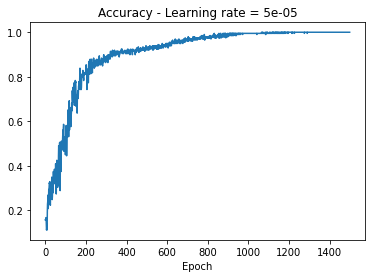

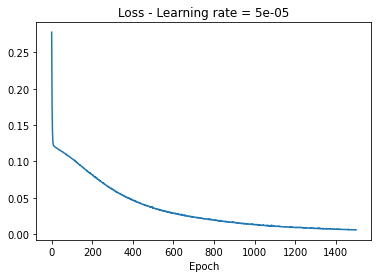

In [7]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

plt.figure(1)
plt.plot(acc, label="train_acc")
#plt.plot(val_acc,color="red", label="train_acc")
plt.title("Accuracy - Learning rate = " + str(param.learningRate))
plt.xlabel("Epoch")
#name = "plot_accuracy_lr_" + str(learningRate) + ".svg"
#name = name.replace(".", ",", 1)
#plt.savefig(name, format="svg")

plt.figure(2)
plt.plot(loss, label="train_loss")
#plt.plot(val_loss,color="red", label="val_loss")
plt.title("Loss - Learning rate = " + str(param.learningRate))
plt.xlabel("Epoch")
#name = "plot_loss_lr_" + str(learningRate) + ".svg"
#name = name.replace(".", ",", 1)
#plt.savefig(name, format="svg")

